In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [ ]:
coco_df=pd.read_excel('Coca.xlsx')
coco_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
coco_df.shape

(42, 2)

In [ ]:
coco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [ ]:
coco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
coco_df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

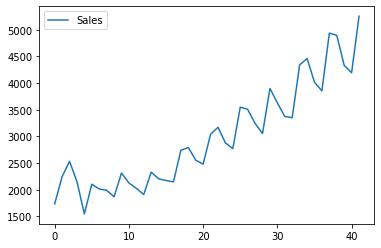

In [ ]:
coco_df.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


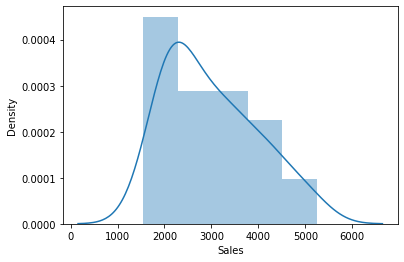

In [ ]:
sns.distplot(coco_df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


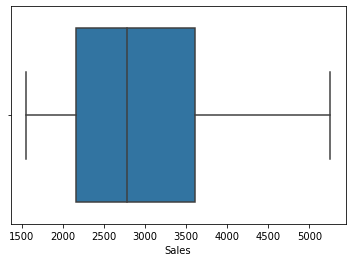

In [ ]:
sns.boxplot(coco_df['Sales'])

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <a list of 10 Patch objects>)

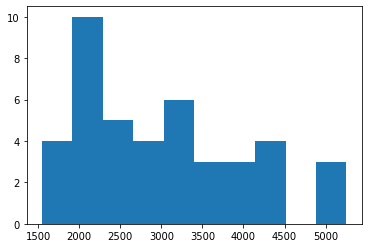

In [ ]:
plt.hist(coco_df['Sales'])

In [ ]:
coco_df['Quarter_Year'] = coco_df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Extract date from the quarters
coco_df['Date'] = (pd.to_datetime(coco_df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))

In [ ]:
coco_df

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [ ]:
coco_df['Quarters']=0
for i in range(42):
  n = coco_df['Quarter'][i]
  coco_df['Quarters'][i] = n[0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
coco_df['Quarters'] = 0

for i in range(42):
    n = coco_df['Quarter'][i]
    coco_df['Quarters'][i] = n[0:2]
    
coco_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [ ]:
#create dummy variables for quaters

In [ ]:
coco_dummy=pd.DataFrame(pd.get_dummies(coco_df['Quarters']))
coco_dummy

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [ ]:
coco_1=pd.concat((coco_df,coco_dummy),axis=1)
coco_1

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [ ]:
coco_1.drop(['Quarter_Year','Quarter'],axis=1,inplace=True)

In [ ]:
coco_1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


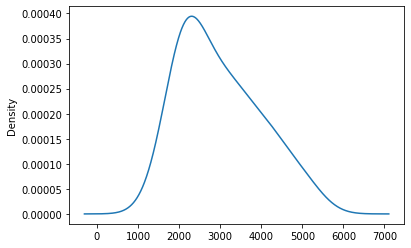

In [ ]:
coco_1.Sales.plot(kind='kde')

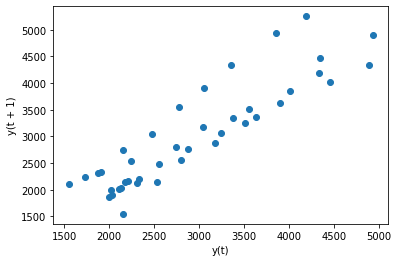

In [ ]:
from pandas.plotting import lag_plot
lag_plot(coco_1.Sales)

In [ ]:
#get the data in month and year wise

In [ ]:
coco_1['Date']=pd.to_datetime(coco_1.Date,format='%b-%y')
coco_1['month']=coco_1.Date.dt.strftime('%b')
coco_1['year']=coco_1.Date.dt.strftime('%y')
coco_1

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,86
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,86
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,86
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,86
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,87
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,87
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,87
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,87
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,88
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,88


In [ ]:
coco=pd.pivot_table(data=coco_1,values='Sales',index='year',columns='Quarters',aggfunc='mean',fill_value=0)

In [ ]:
coco.head(5)

Quarters,Q1,Q2,Q3,Q4
year,,,,
86,1734.827000,2244.960999,2533.804993,2154.962997
87,1547.818996,2104.411995,2014.362999,1991.746998
88,1869.049999,2313.631996,2128.320000,2026.828999
89,1910.603996,2331.164993,2206.549995,2173.967995
90,2148.278000,2739.307999,2792.753998,2556.009995


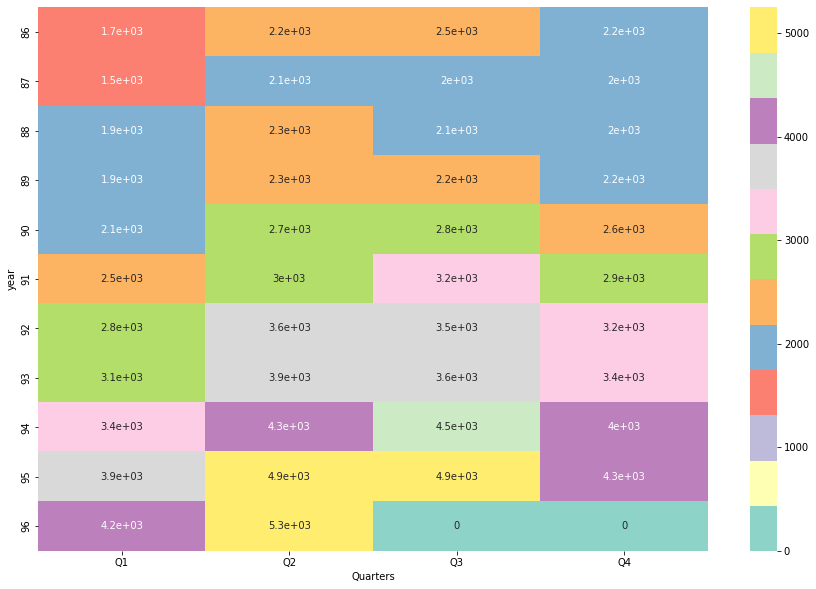

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(coco,annot=True,cmap='Set3')

#note:Q2 has higher sales during the period

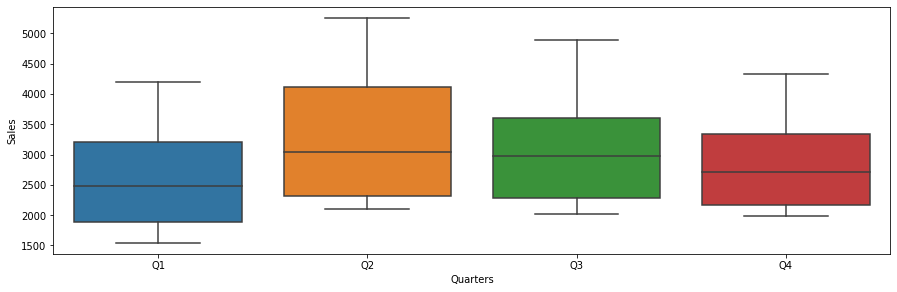

In [ ]:
#boxplot
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x='Quarters',y='Sales',data=coco_df)

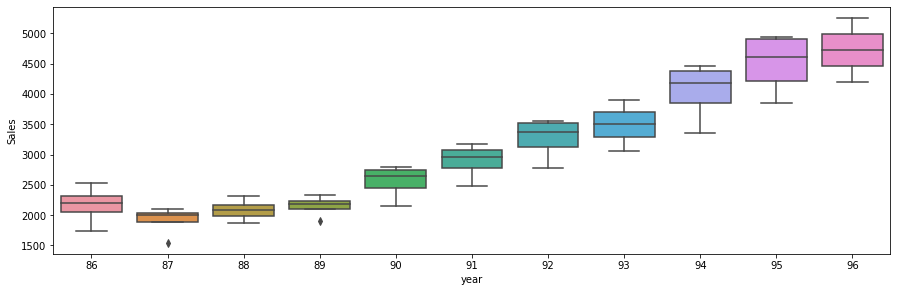

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(212)
sns.boxplot(x='year',y='Sales',data=coco_1)

#Data preprocessing

In [ ]:
coco_1.shape

(42, 9)

In [ ]:
co=np.arange(1,43)

In [ ]:
t=pd.Series(data=co)
t
t_sq=pd.Series(data=co*co)
t_sq
coco_1['t']=t
coco_1['t_sq']=t_sq
#applying log function on sales
coco_1['log_sales']=np.log(coco_1['Sales'])

In [ ]:
coco_1.head(10)

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,t,t_sq,log_sales
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,86,1,1,7.458663
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,86,2,4,7.716443
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,86,3,9,7.837477
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,86,4,16,7.675529
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,87,5,25,7.344602
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,87,6,36,7.651791
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,87,7,49,7.608058
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,87,8,64,7.596767
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,88,9,81,7.533186
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,88,10,100,7.746574


#Moving average

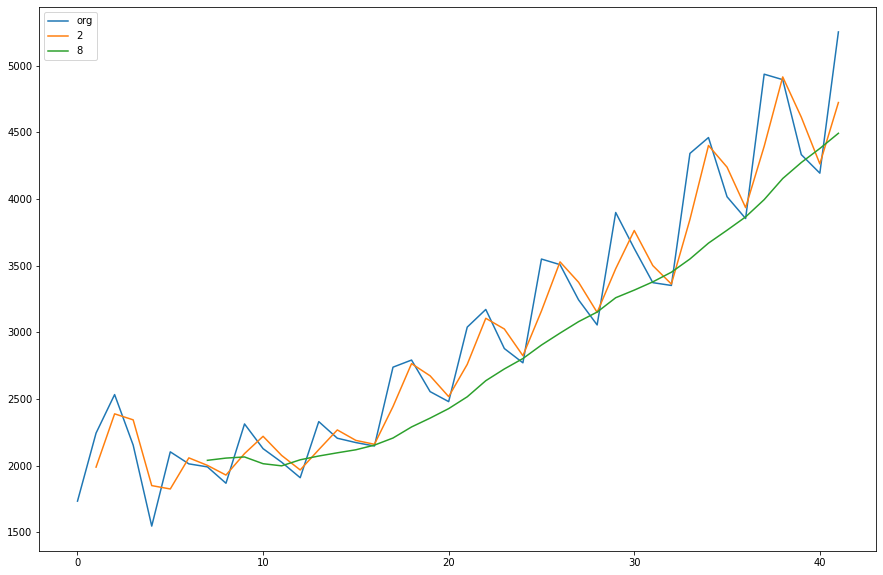

In [ ]:
#smoothing graph
plt.figure(figsize=(15,10))
coco_df.Sales.plot(label='org')
for i in range(2,12,6):
  coco_df['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  

#Time series decompositionplot

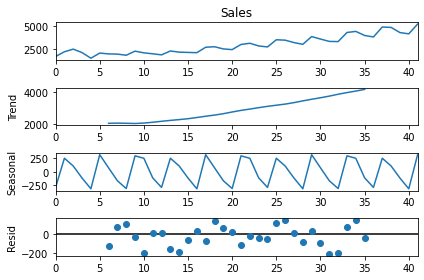

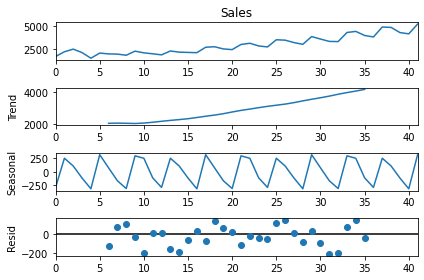

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts=seasonal_decompose(coco_df.Sales,period=12)
plt.show()
ts.plot()

In [ ]:
#ACF plots ,PACF plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

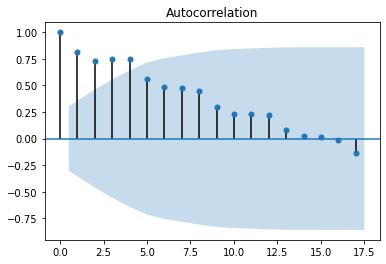

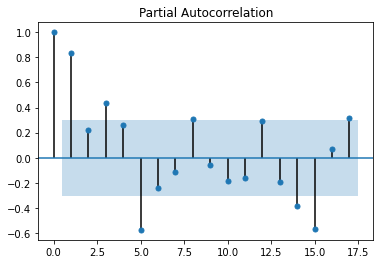

In [ ]:
acf=plot_acf(coco_1['Sales'])
pacf=plot_pacf(coco_1['Sales'])

#Splitting data into train and test

In [ ]:
Train=coco_1.head(36)
Test=coco_1.tail(6)

In [ ]:
def MAE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#Linear model
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


667.4256979280374

In [ ]:
#exponential 

In [ ]:
exp_model=smf.ols('log_sales~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['Sales'])-np.exp(pred_exp))**2))
rmse_exp

526.7672615478397

In [ ]:
#Quardratic
quad=smf.ols('Sales~t+t_sq',data=Train).fit()
pred_quad=pd.Series(quad.predict(Test[['t','t_sq']]))
rmse_quad=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_quad))**2))
rmse_quad

485.14067020702447

In [ ]:
#Additive seasonality 
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1895.5593132150468

In [ ]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']]))
rmse_add=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add

283.0619605704119

In [ ]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mul_sea)))**2))
rmse_Mul_sea

323.2127536714574

In [ ]:
#Multiplicative Additive Seasonality 
Mul_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mul_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea=np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.array(pred_Mul_sea)))**2))
rmse_Mul_sea

4594.887973570125

#Forecasting on data based methods

In [ ]:
#Simple Exponential Method
se_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_se = se_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_se = MAE(pred_se,Test.Sales) 
MAE_se

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


16.554035942122763

In [ ]:
# Holt method with Additive trend
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAE_hw = MAE(pred_hw,Test.Sales) 
MAE_hw

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  


9.383070874682106

In [ ]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAE__hwe_mul_add = MAE(pred_hwe_mul_add,Test.Sales)
MAE__hwe_mul_add

3.131107033814944

In [ ]:
hwe_model_add_add = ExponentialSmoothing(coco_1["Sales"],seasonal="add",trend="add",seasonal_periods=10).fit()
hwe_model_add_add.forecast(10)

42    5026.573670
43    5343.532126
44    5216.857769
45    5425.031314
46    5399.871172
47    5826.384321
48    5765.540076
49    5893.022507
50    5776.313831
51    6126.328549
dtype: float64

In [ ]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_Mul_sea","rmse_Mul_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_Mul_sea,rmse_Mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,485.140670
1,rmse_exp,526.767262
0,rmse_linear,667.425698
3,rmse_add_sea,1895.559313
4,rmse_Mul_sea,4594.887974
5,rmse_Mul_sea,4594.887974
